In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Read happy data
undata = pd.read_csv("data/country_profile_variables.csv")
happy_data = pd.read_csv("2017.csv")
happy_data.head(5)


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [96]:
undata['country'] = undata['country'].replace({'United States of America': 'United States'})  
undata

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955,3,4714.1,6.8,...,12.4,146,46.5,34.8/1.4,3902,25,75.4/28.2,88.6/22.5,0.42,-99
6,Anguilla,Caribbean,91,15,165.7,97.6,320,2.9,21879.6,2.3,...,76,52,61.1,0.1/9.8,0,136,94.6/...,97.9/...,-99,-99
7,Antigua and Barbuda,Caribbean,442,102,231.8,92.3,1356,4.1,14764.5,1.9,...,65.2,55,22.3,0.5/5.8,-99,84,97.9/97.9,91.4/91.4,0.12,-99
8,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6,...,69.4,256,10,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99
9,Armenia,WesternAsia,29743,2930,102.9,88.8,10529,3,3489.1,19,...,58.2,114,11.7,5.5/1.8,48,46,100.0/100.0,96.2/78.2,3.17,-99


In [46]:
un_data = undata.rename(columns={"country": "Country", "Pop. using improved sanitation facilities (urban/rural, %)": "Sanitation" })
un_data_san = un_data[["Country", "Sanitation"]]
un_data_san.head()

,Country,Sanitation
0,Afghanistan,21.43
1,Albania,2.96
2,Algeria,0.05
3,American Samoa,-99
4,Andorra,-99


In [105]:
happy_df = happy_data[["Country", "Happiness.Rank"]]

In [48]:
new_df = pd.merge(happy_df, un_data_san, on="Country")
new_df.head()

,Country,Happiness.Rank,Sanitation
0,Norway,1,-99
1,Denmark,2,-99
2,Iceland,3,-99
3,Switzerland,4,-99
4,Finland,5,-99


In [49]:
new_df.count()

Country           136
Happiness.Rank    136
Sanitation        136
dtype: int64

In [88]:
clean_df = new_df[new_df.Sanitation != '-99']
clean_df = clean_df[clean_df.Sanitation != '...']
clean_df.head()

,Country,Happiness.Rank,Sanitation
11,Costa Rica,12,0.22
19,Chile,20,0.02
21,Brazil,22,0.06
22,Argentina,24,0.01
23,Mexico,25,0.03


In [64]:
x_axis = clean_df["Country"]
san_data = clean_df["Sanitation"].astype(float)
happy_data = clean_df["Happiness.Rank"]


In [ ]:
# plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
# df2.plot(figsize=(20,10))

san = plt.bar(x_axis, san_data, align="edge",  color="blue", label="")

# plt.figure(figsize=(75, 15))
# plt.savefig("UNDATA1.png")
fig = plt.gcf()
fig.set_size_inches(5, 8)
# hap = plt.plot(x_axis, happy_data, color="red", linewidth=1, label="Happy Index")
plt.title("Happy Index vs. Clean Sanitation")


([<matplotlib.axis.YTick at 0x23d969fc748>],
 <a list of 1 Text yticklabel objects>)

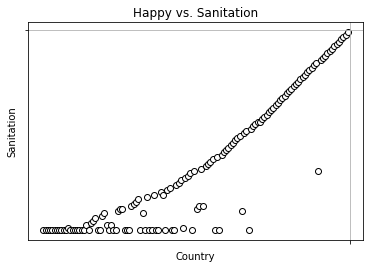

In [92]:
x_axis = new_df["Country"]
san_data = new_df["Sanitation"]
happy_data = new_df["Happiness.Rank"]



# plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")
plt.scatter(x_axis, san_data, marker="o", facecolors="white", edgecolors="black")

plt.axis('tight')
plt.title("Happy vs. Sanitation")
plt.xlabel("Country")
plt.ylabel("Sanitation")
plt.grid(True)
plt.xticks([""])
plt.yticks([""])
# plt.savefig("CityLat_Wind.png")

In [103]:
undata

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955,3,4714.1,6.8,...,12.4,146,46.5,34.8/1.4,3902,25,75.4/28.2,88.6/22.5,0.42,-99
6,Anguilla,Caribbean,91,15,165.7,97.6,320,2.9,21879.6,2.3,...,76,52,61.1,0.1/9.8,0,136,94.6/...,97.9/...,-99,-99
7,Antigua and Barbuda,Caribbean,442,102,231.8,92.3,1356,4.1,14764.5,1.9,...,65.2,55,22.3,0.5/5.8,-99,84,97.9/97.9,91.4/91.4,0.12,-99
8,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6,...,69.4,256,10,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99
9,Armenia,WesternAsia,29743,2930,102.9,88.8,10529,3,3489.1,19,...,58.2,114,11.7,5.5/1.8,48,46,100.0/100.0,96.2/78.2,3.17,-99


In [109]:
undata = undata.rename(columns={"country": "Country", "Pop. using improved drinking water (urban/rural, %)": "Improved Drinking Water" })
undata['Country'] = undata['Country'].replace({'United States of America': 'United States'})  
new_data = undata[["Country", "Improved Drinking Water"]]
new_data.head()

,Country,Improved Drinking Water
0,Afghanistan,45.1/27.0
1,Albania,95.5/90.2
2,Algeria,89.8/82.2
3,American Samoa,62.5/62.5
4,Andorra,100.0/100.0


In [110]:
new_data[["Urban", "Rural"]] = new_data["Improved Drinking Water"].str.split("/", expand=True)



In [137]:
new_data.head()

,Country,Improved Drinking Water,Urban,Rural
0,Afghanistan,45.1/27.0,45.1,27.0
1,Albania,95.5/90.2,95.5,90.2
2,Algeria,89.8/82.2,89.8,82.2
3,American Samoa,62.5/62.5,62.5,62.5
4,Andorra,100.0/100.0,100.0,100.0


In [115]:
water_df = pd.merge(happy_df, new_data, on="Country")
water_df = water_df[water_df.Rural.notnull()]
water_df.dropna()

,Country,Happiness.Rank,Improved Drinking Water,Urban,Rural
0,Norway,1,98.0/98.3,98.0,98.3
1,Denmark,2,99.6/99.6,99.6,99.6
2,Iceland,3,98.7/100.0,98.7,100.0
3,Switzerland,4,99.9/99.8,99.9,99.8
4,Finland,5,99.4/88.0,99.4,88.0
5,Netherlands,6,97.5/99.9,97.5,99.9
6,Canada,7,100.0/99.0,100.0,99.0
8,Sweden,9,99.2/99.6,99.2,99.6
9,Australia,10,100.0/100.0,100.0,100.0
10,Israel,11,100.0/100.0,100.0,100.0


In [120]:
water_top = water_df[:20]
countries = water_top["Country"]
happiness_rank = water_top["Happiness.Rank"]
urban_water = water_top["Urban"].astype(float)

water_top

,Country,Happiness.Rank,Improved Drinking Water,Urban,Rural
0,Norway,1,98.0/98.3,98.0,98.3
1,Denmark,2,99.6/99.6,99.6,99.6
2,Iceland,3,98.7/100.0,98.7,100.0
3,Switzerland,4,99.9/99.8,99.9,99.8
4,Finland,5,99.4/88.0,99.4,88.0
5,Netherlands,6,97.5/99.9,97.5,99.9
6,Canada,7,100.0/99.0,100.0,99.0
8,Sweden,9,99.2/99.6,99.2,99.6
9,Australia,10,100.0/100.0,100.0,100.0
10,Israel,11,100.0/100.0,100.0,100.0


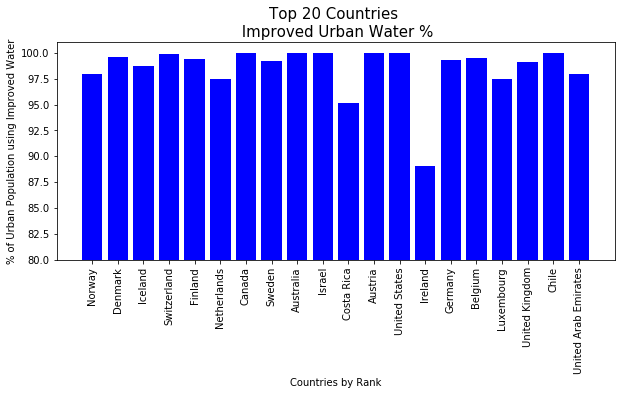

In [207]:
x_axis = water_top["Country"]


plt.bar(x_axis, urban_water, color='blue')
plt.title("Top 20 Countries \n Improved Urban Water %", size = 15)
plt.xlabel("Countries by Rank")
plt.ylabel("% of Urban Population using Improved Water")
plt.ylim([80,101])
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.savefig("water_top.png")

In [180]:
water_mid = water_df[57:77]
countries_mid = water_mid["Country"]
happiness_rank_mid = water_mid["Happiness.Rank"]
urban_water_mid = water_mid["Urban"].astype(float)


water_mid

,Country,Happiness.Rank,Improved Drinking Water,Urban,Rural
58,Estonia,66,97.5/96.6,97.5,96.6
59,Belarus,67,94.1/95.2,94.1,95.2
60,Libya,68,96.8/95.7,96.8,95.7
61,Turkey,69,98.3/85.5,98.3,85.5
62,Paraguay,70,95.5/78.4,95.5,78.4
63,Philippines,72,77.9/70.8,77.9,70.8
64,Serbia,73,98.2/94.2,98.2,94.2
65,Jordan,74,98.6/98.9,98.6,98.9
66,Hungary,75,97.8/98.6,97.8,98.6
67,Jamaica,76,79.9/84.1,79.9,84.1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

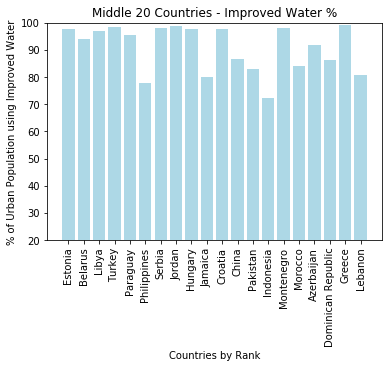

In [181]:
x_axis = water_mid["Country"]


plt.bar(x_axis, urban_water_mid, color='lightblue')
plt.title("Middle 20 Countries - Improved Water %")
plt.xlabel("Countries by Rank")
plt.ylabel("% of Urban Population using Improved Water")
plt.ylim([20,100])
plt.xticks(rotation=90)

In [179]:
water_bottom = water_df[114:134]
countries_b = water_bottom["Country"]
happiness_rank_b = water_bottom["Happiness.Rank"]
urban_water_b = water_bottom["Urban"].astype(float)

water_bottom


,Country,Happiness.Rank,Improved Drinking Water,Urban,Rural
116,Burkina Faso,134,50.4/6.7,50.4,6.7
117,Niger,135,37.9/4.6,37.9,4.6
118,Malawi,136,47.3/39.8,47.3,39.8
119,Chad,137,31.4/6.5,31.4,6.5
120,Zimbabwe,138,49.3/30.8,49.3,30.8
121,Lesotho,139,37.3/27.6,37.3,27.6
122,Angola,140,88.6/22.5,88.6,22.5
123,Afghanistan,141,45.1/27.0,45.1,27.0
124,Botswana,142,78.5/43.1,78.5,43.1
125,Benin,143,35.6/7.3,35.6,7.3


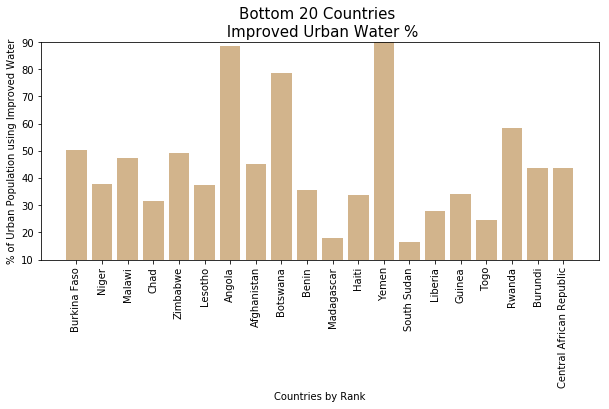

In [205]:
x_axis = water_bottom["Country"]


plt.bar(x_axis, urban_water_b, color='tan')
plt.title("Bottom 20 Countries \n Improved Urban Water %", size=15)
plt.xlabel("Countries by Rank")
plt.ylabel("% of Urban Population using Improved Water")
plt.ylim([10,90])
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.savefig("water_bottom.png")

In [182]:
urban_top = water_top["Urban"].astype(float)
urban_bottom = water_bottom["Urban"].astype(float)
urban_mid = water_mid["Urban"].astype(float)
top_avg = urban_top.mean()
bottom_average = urban_bottom.mean()
mid_avg = urban_mid.mean()
averages = [top_avg, mid_avg, bottom_average]

In [183]:
summary_water = pd.DataFrame({"Top Happy Average" : [average_top],"Bottom Happy Average ": [bottom_average],
                             "Mid Happy Average" : [mid_avg]})
summary_water

# top_spenders = pd.DataFrame({"Purchase Count" : top_count,
#                          "Average Purchase Price": round(avg_pur_top, 2),
#                          "Total Purchase Value": total_price_top})

,Top Happy Average,Bottom Happy Average,Mid Happy Average
0,98.5,44.73,90.71
